## Observations and Insights

"""
In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. 
Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to 
compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. 

"""

## Dependencies and starter code

In [1]:
# import dependencies
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [3]:
# study mouse data 
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# study results data
study_results = pd.read_csv("data/Study_results.csv")
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# merge two csv files using left join using "Mouse ID" column
mousestudy = pd.merge(mouse_metadata, study_results, on='Mouse ID')
mousestudy

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [6]:
# generate a summary stats table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# use groupby() function operation to create multiple series to organise data in a table 
# groupby operations can split data, apply functions, combine results. when data is split, we can then aggreate, transform and filter
# series is one-dimensional labeled array capable of holding data of any type. axis labels are collectively called index.
means = mousestudy.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = mousestudy.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = mousestudy.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = mousestudy.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = mousestudy.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
regimen_summary_table = pd.DataFrame({'Mean Tumor Volume':means,
                              'Median Tumor Volume':medians,
                              'Tumor Volume Variance':variances,
                              'Tumor Volume Std. Dev.':sds,
                              'Tumor Volume Std. Err.':sems})
regimen_summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

# pandas bar plot formula 
#variable_counts = variable_name['x axis label'].value_counts()
#variable_counts.plot(kind="bar")
#plt.title('Bar Plot Title')
#plt.xlabel ("xlabel")
#plt.xticks(y_pos, objects)
#plt.ylabel('ylabel')
#plt.show()

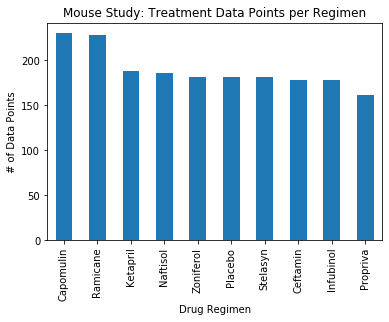

In [7]:
# generate a bar plot showing number of data points for each treatment regimen using pandas
counts = mousestudy["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.title("Mouse Study: Treatment Data Points per Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Data Points")
plt.show()

pyplot bar plot formula 
plt.title('Bar Title')
plt.barh(y_pos, performance, align='center', alpha=0.5) #horizontal bar plot
plt.bar(y_pos, performance, align='center', alpha=0.5) #vertical, default bar plot
plt.xlabel ("xlabel")
plt.xticks(y_pos, objects)
plt.ylabel('ylabel')
plt.show()

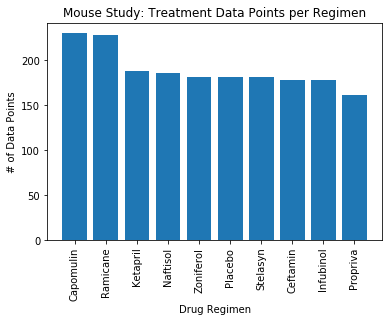

In [8]:
# generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = mousestudy['Drug Regimen'].value_counts()
plt.title("Mouse Study: Treatment Data Points per Regimen")
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Data Points")
plt.show()

## Pie plots

pandas pie plot formula
plt.title('Pie Title')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

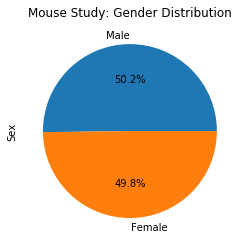

In [9]:
# generate a pie plot showing the distribution of female versus male mice using pandas
plt.title('Mouse Study: Gender Distribution')
counts = mouse_metadata.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()


pyplot pie plot formula
plt.title('Pie Title')
counts = mouse_metadata.Sex.value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

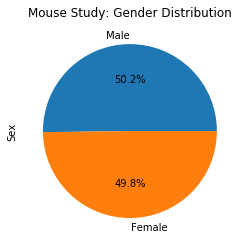

In [10]:
# generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Mouse Study: Gender Distribution')
counts = mouse_metadata.Sex.value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [11]:
# calculate the final tumor volume of each mouse across four of the most promising treatment regimens. calculate the IQR and quantitatively determine if there are any potential outliers. 
# start by getting the final/ last (greatest) timepoint for each mouse
max_tumor = mousestudy.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()

In [12]:
# merge/ left join this group df with the original df to get the tumor volume at the last timepoint for each regimen
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(mousestudy,on=['Mouse ID','Timepoint'],how="left")
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

In [13]:
# quantitatively determine capomulin outliers, values outside the expectation
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
# quantitatively determine ramicane outliers, values outside the expectation
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
# quantitatively determine infubinol outliers, values outside the expectation
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [16]:
# quantitatively determine ceftamin outliers, values outside the expectation
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


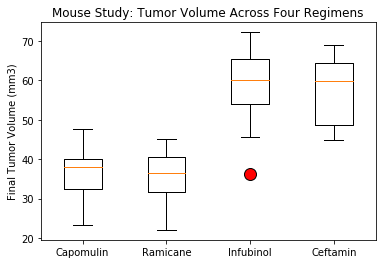

In [17]:
# generate a box plot (statistical value) of the final tumor volume of each mouse across four regimens of interest
plt.title('Mouse Study: Tumor Volume Across Four Regimens')
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

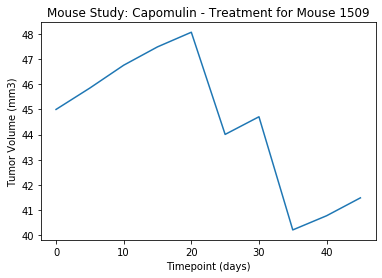

In [18]:
# generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = mousestudy.loc[mousestudy['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.title('Mouse Study: Capomulin - Treatment for Mouse 1509')
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

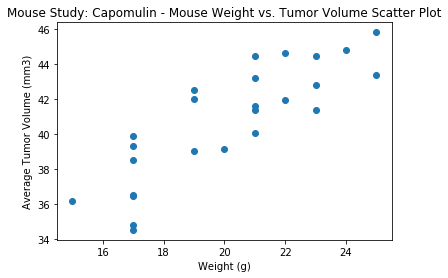

In [19]:
# generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = mousestudy.loc[mousestudy['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.title('Mouse Study: Capomulin - Mouse Weight vs. Tumor Volume Scatter Plot')
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


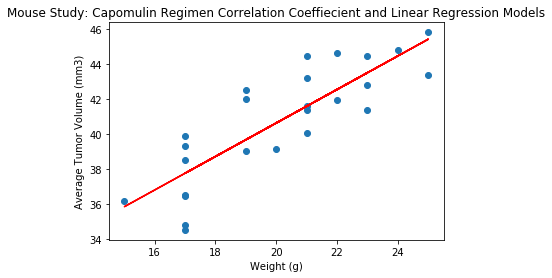

In [20]:
# calculate stats as to the correlation coefficient and linear regression model 
# create f'string to write statments for mouse weight and average tumor volume for the Capomulin regimen
plt.title('Mouse Study: Capomulin Regimen Correlation Coeffiecient and Linear Regression Models')
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()